In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
df = pd.read_csv("UM_datathon_2024.csv")
df.head()

,time,difficulty,estimated_leverage_ratio,addresses_count_active,addresses_count_sender,addresses_count_receiver,exchange_whale_ratio,coinbase_premium_gap,coinbase_premium_index,coinbase_premium_gap_usdt_adjusted,...,long_liquidations,short_liquidations,long_liquidations_usd,short_liquidations_usd,open_price,high_price,low_price,close_price,volume,open_interest
0,2020-03-25 10:00:00,1.655292e+13,0.070577,30656,12888,21617,0.940847,12.50,0.189479,1.125713,...,425.717,8.770,2.831061e+06,58055.69835,6500.0,6591.5,6500.0,6591.5,0.004,1.198203e+08
1,2020-03-25 11:00:00,1.655292e+13,0.071966,21379,8467,14875,0.885981,18.64,0.285830,2.369076,...,385.434,21.699,2.499324e+06,142518.22527,6591.5,6628.5,6457.5,6511.5,438.873,1.211306e+08
2,2020-03-25 12:00:00,1.655292e+13,0.072686,29164,13292,19201,0.884669,17.17,0.260595,7.388429,...,6.060,35.155,3.950575e+04,230609.80208,6511.5,6588.5,6502.0,6583.5,529.318,1.236765e+08
3,2020-03-25 13:00:00,NaN,0.070549,0,0,0,0.000000,16.12,0.245213,4.339870,...,106.667,134.954,7.070354e+05,898106.41361,6583.5,6745.5,6562.0,6585.0,449.162,1.197917e+08
4,2020-03-25 14:00:00,1.655292e+13,0.071959,25234,10221,18363,0.867330,14.46,0.218125,-2.762051,...,124.720,52.400,8.154464e+05,347108.26236,6585.0,6640.0,6516.0,6590.0,258.831,1.228579e+08


In [41]:
# Get columns that has null values and the number of null values in each column
null_columns = df.columns[df.isnull().any()]
print(df[null_columns].isnull().sum())


difficulty                              135
coinbase_premium_gap                     32
coinbase_premium_index                   32
coinbase_premium_gap_usdt_adjusted       32
coinbase_premium_index_usdt_adjusted     32
taker_buy_volume                          7
taker_sell_volume                         7
taker_buy_ratio                           7
taker_sell_ratio                          7
taker_buy_sell_ratio                      7
fees_transaction_mean                   135
fees_transaction_mean_usd               135
tokens_transferred_mean                 135
dtype: int64


In [42]:
df['difficulty'] = df['difficulty'].fillna(0)
df['fees_transaction_mean'] = df['fees_transaction_mean'].fillna(0)
df['fees_transaction_mean_usd'] = df['fees_transaction_mean_usd'].fillna(0)
df['tokens_transferred_mean'] = df['tokens_transferred_mean'].fillna(0)

In [43]:
for x in null_columns:
    if df[x].isna().sum() > 0:
        df[x].fillna(df[x].mean(), inplace=True)
    else:
        continue

C:\Users\USER\AppData\Local\Temp\ipykernel_13928\300905040.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[x].fillna(df[x].mean(), inplace=True)


In [44]:
df.to_csv('UM_datathon_2024_cleaned.csv', index=False)

In [45]:
from sklearn.ensemble import RandomForestRegressor
df['time'] = pd.to_datetime(df['time'])
df['time'] = df['time'].astype('int64')
# Put all features into X and the target into y
X = df.drop(columns=['close_price','high_price','low_price','open_price'])
y = df['close_price']

# Assuming 'X' is your features and 'y' is the target (close_price)
model = RandomForestRegressor(random_state=42)
model.fit(X, y)

feature_importances = model.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
top_17_factors = importance_df.sort_values(by='Importance', ascending=False).head(17)


In [46]:
top_17_factors

,Feature,Importance
38,open_interest,0.531538
25,exchange_supply_ratio,0.225012
0,time,0.202696
1,difficulty,0.021113
2,estimated_leverage_ratio,0.008525
17,blockreward_usd,0.004652
21,fees_transaction_median_usd,0.003089
22,miner_supply_ratio,0.001325
19,fees_transaction_mean_usd,0.000862
37,volume,0.000447


In [47]:
# Create a new dataframe with the top 17 features
df_top_17 = df[top_17_factors["Feature"].values]
df_top_17.head()

df_top_17["close_price"] = y

C:\Users\USER\AppData\Local\Temp\ipykernel_13928\1244867665.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_17["close_price"] = y


In [48]:
df_top_17.isna().sum()

open_interest                           0
exchange_supply_ratio                   0
time                                    0
difficulty                              0
estimated_leverage_ratio                0
blockreward_usd                         0
fees_transaction_median_usd             0
miner_supply_ratio                      0
fees_transaction_mean_usd               0
volume                                  0
coinbase_premium_gap                    0
coinbase_premium_index                  0
tokens_transferred_median               0
coinbase_premium_index_usdt_adjusted    0
fees_transaction_mean                   0
blockreward                             0
fees_transaction_median                 0
close_price                             0
dtype: int64

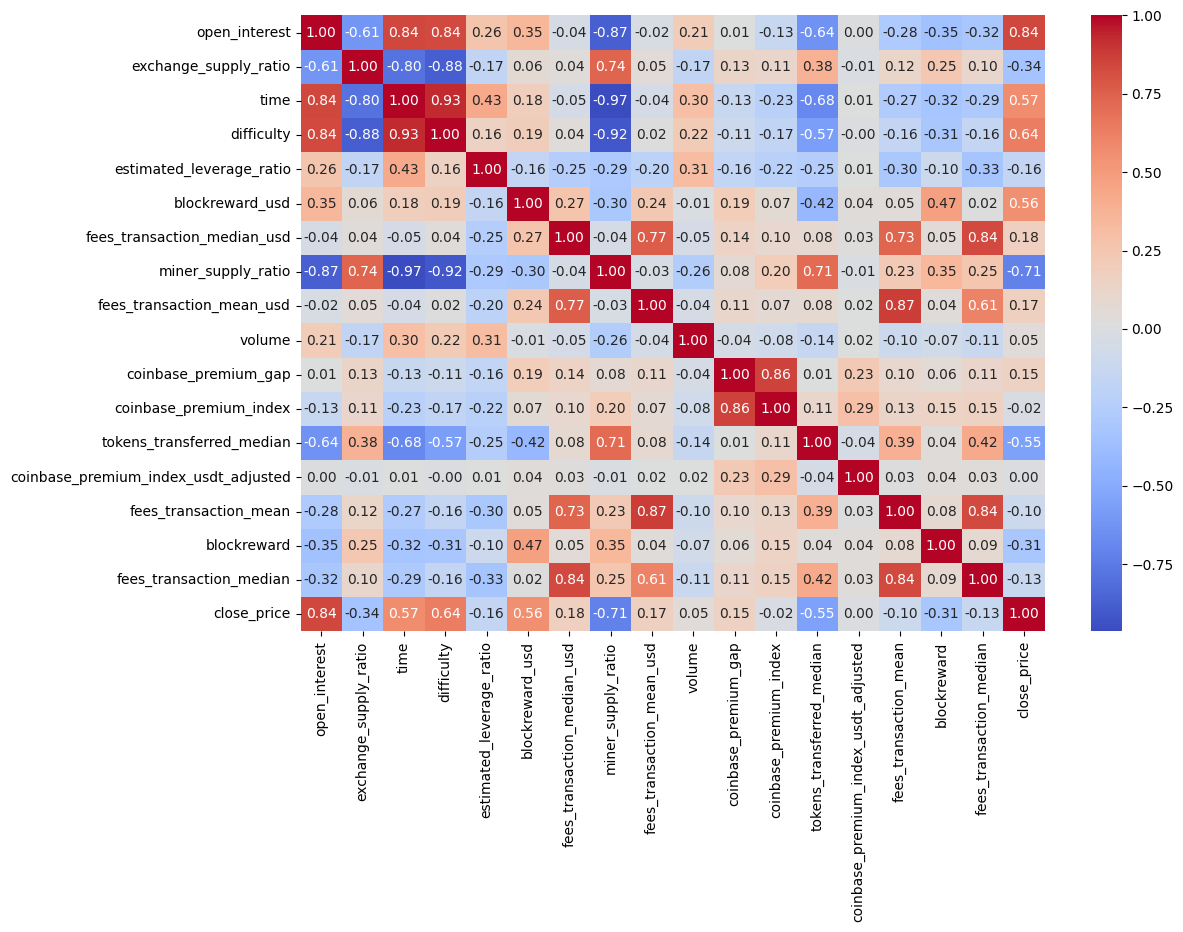

In [49]:
# Set figure size
plt.figure(figsize=(12, 8))  # Adjust the values as needed (width, height)

# Create heatmap
sns.heatmap(df_top_17.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


Stacked Model R^2 Score: 0.9926


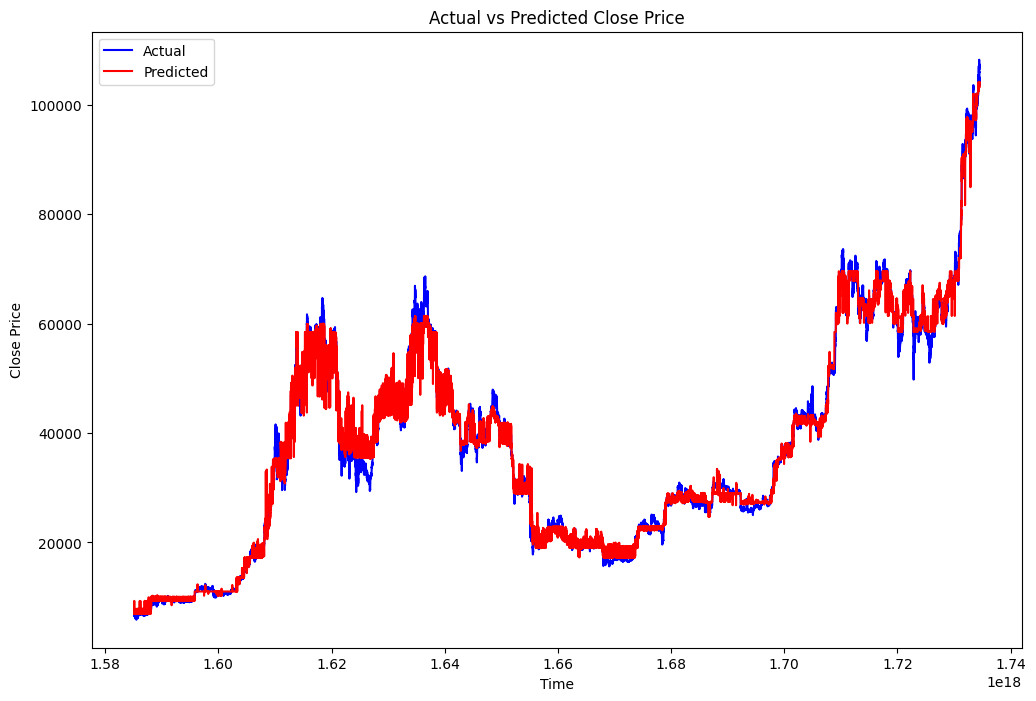

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Create a synthetic dataset (replace this with your actual stock data)
X = df_top_17.drop(columns=['close_price'])
y = df_top_17['close_price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Base models (Random Forest and XGBoost)
base_models = [
    ('rf', RandomForestRegressor(n_estimators=50,max_depth=5,min_samples_split=10,min_samples_leaf=5,max_features='sqrt',random_state=42))
,
    ('xgb', XGBRegressor(
    n_estimators=50,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=1,
    reg_lambda=1,
    random_state=42
)
)
]

# Meta-model (Using Random Forest in this case, but you can choose another model)
meta_model = RandomForestRegressor(
    n_estimators=50,
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='sqrt',
    random_state=42
)

# Stacked model (combining base models using a meta-model)
stacked_model = StackingRegressor(estimators=base_models, final_estimator=meta_model)

# Train the stacked model
stacked_model.fit(X_train, y_train)

# Make predictions
y_pred = stacked_model.predict(X_test)

# Evaluate the model
score = stacked_model.score(X_test, y_test)
print(f"Stacked Model R^2 Score: {score:.4f}")

# Plot Actual vs Predicted values against time
plt.figure(figsize=(12, 8))
plt.plot(df['time'], df['close_price'], label='Actual', color='blue')
plt.plot(df['time'], stacked_model.predict(X), label='Predicted', color='red')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Close Price')
plt.legend()


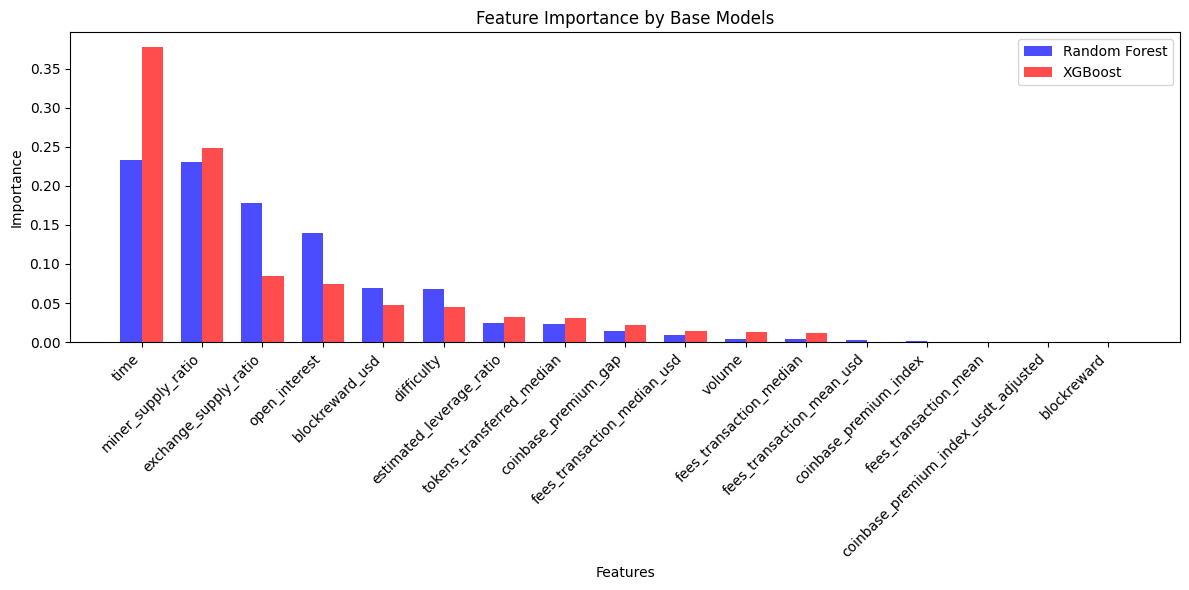

In [51]:
# Feature importance for Random Forest
rf_model = stacked_model.named_estimators_['rf']
rf_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Feature importance for XGBoost
xgb_model = stacked_model.named_estimators_['xgb']
xgb_importance = pd.Series(xgb_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Combine the feature importances into a DataFrame
importance_df = pd.DataFrame({
    'Feature': rf_importance.index,
    'Random Forest': rf_importance.values,
    'XGBoost': xgb_importance.values
})

# Plot the grouped bar chart
bar_width = 0.35
index = np.arange(len(importance_df))  # Indices for features

plt.figure(figsize=(12, 6))
plt.bar(index, importance_df['Random Forest'], bar_width, label='Random Forest', color='blue', alpha=0.7)
plt.bar(index + bar_width, importance_df['XGBoost'], bar_width, label='XGBoost', color='red', alpha=0.7)

# Add feature names as x-axis labels
plt.xticks(index + bar_width / 2, importance_df['Feature'], rotation=45, ha='right')

# Add titles and labels
plt.title('Feature Importance by Base Models')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.legend()
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()